## PART A.  Develop a Baseline Neural Network Model
#### Predicting Concrete Strength
Hidden layer of 10 nodes, activation f: RelU,  
optimizer: adam and loss: MSE
Train 50 epochs, 50 Iterations for MSE

##### Import functions required and the Keras objects library

In [4]:
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
print ("Ready, Set, Go!!!!!!!")

Ready, Set, Go!!!!!!!


 ### Build the neural network

##### PreProcess Data

In [5]:
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.4


In [6]:
concrete_data.isnull().sum(); #Check for null values

##### Define predictors and target

In [7]:
concrete_data_columns = concrete_data.columns
#SET TARGET VARIABLE - STRENGTH
target = concrete_data['Strength']
#SET PREDICTORS TO BE ALL OTHER COLUMNS
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]

In [8]:
cols = predictors.shape[1]
predictors.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28


#### Check data size

In [9]:
#TARGET - STRENGTH COLUMN
shape = concrete_data.shape
print('\nNumber of samples/rows :', shape[0])
target.tail(1)


Number of samples/rows : 1030


1029    32.4
Name: Strength, dtype: float64

#### Develop Baseline Regression Model

In [10]:
#SET  VARIABLES FOR THE BASELINE MODEL
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #1 hidden layer , 10 nodes, relu activation
    model.add(Dense(output)) #Output Layer
        # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Split Train/Test Data - Step 1

In [11]:
#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

# Split Train/Test Data
X = predictors
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
train_test_split(y, shuffle=True);

## Train and Evaluate Model - Steps 2,3 and
## Iterations - Step 4

#### Define and compile baseline regression model

In [12]:
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #1 hidden layer , 10 nodes, relu activation
    model.add(Dense(output)) #Output Layer
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Initialize the Model, Split Train/Test Data, Train Model, Evaluate and List MSE

In [13]:
#USED TO MONITOR OUTPUT IN A SINGLE LINE
from IPython.display import display, clear_output

#SET VARIABLES FOR THE ASSIGNMENTS THAT WILL CHANGE IN ASSIGNMENTS
epochs = 50
b = 32
Alist = []

#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

#SET THE PROGRESS COUNTDOWN n
n = 0
iterations = 50
i = 0

# HERE WE GO!
for i in range(iterations):
    
    #To monitor will set up a countER
    clear_output(wait=True)            # Print and "overwrite" all print statements sequentially
    n = i + 1                          # Counter less the index for report
    print("Iteration {} ".format(n) + "..... Training is in progress.")
        
#Initialize the model
    model = regression_model(nodes)

# Split Train/Test Data
    X = predictors
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
    train_test_split(y, shuffle=True)

# Train / fit the model
    model.fit(X, y, validation_split=0.3, epochs=epochs, batch_size=b, verbose=0, shuffle=True)
    prediction = model.predict(X)
    prediction
        
# Calculate MSE of EACH iteration
    mse = mean_squared_error(target,prediction)

# Create a list of MSE's, add each one to a list
    Alist.append(mse)
    
result = np.array(Alist) #array needed for numpy evaluation
print ("Training is complete for {} iterations! ".format(n))
result

Iteration 50 ..... Training is in progress.
Training is complete for 50 iterations! 


array([ 279.99236357,  247.89050096,  720.30463716,  488.83294331,
        232.56003187,  394.85713196,  194.87462188,  899.32135858,
        200.04882582,  654.08405556,  157.22002486, 1053.42808054,
        115.82157892,   97.25634733,  129.30595487,  192.34731438,
        155.39402866,  117.24422311,  503.44131794,  126.70112845,
        399.12091731,  125.27165896,  160.51155947,  146.35725777,
        287.65907958,  453.15361998,  382.91148044,  118.69501553,
        189.62274257,  117.35505357,  233.45046889,  160.78268117,
        166.02456392,  349.64312622,  527.41795818,  295.16718212,
        164.44013185,  948.85305288,  162.84821266,  144.36308039,
        110.83721426,  459.55134484,  480.19582623,  121.57304691,
        119.61385259,  133.5066676 ,   86.05790911,  167.42305963,
        130.42567071,  211.15881599])

### A5. Final Report
Calculate and print mean and standard deviation of the mean squared errors of each iteration  

In [14]:
mse_mean = (numpy.mean(result))
mse_stddev = (numpy.std(Alist))

print("FINAL REPORT:")
print("MSE Mean: %.3f" % (mse_mean))
print("MSE Standard Deviation: %.3f" % (mse_stddev))

FINAL REPORT:
MSE Mean: 290.298
MSE Standard Deviation: 228.731


### Part A Observations
Mean squared errors were very erratic and high. 
At around 12 iterations they had a steep drop and continued to have 
improved accuracy although very high error rate

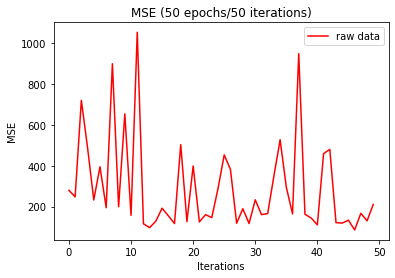

In [15]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

plt.plot(Alist, label= 'raw data', color= 'red')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE (50 epochs/50 iterations)')
plt.legend(loc = 'best')
plt.savefig('fig-msePartA.png')
plt.show()

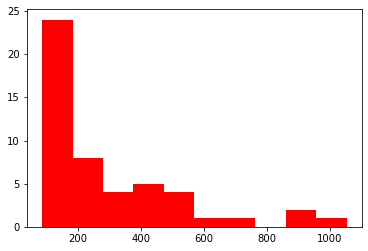

In [18]:
pyplot.hist(result, color='red')
plt.savefig('fig-msePartA-hist.png')
pyplot.show()